##Pytorch_Work_flow
                    *1:"data(prepare and load)"             
                    *2:"build the model"
                    *3:"fitting the model to the data(training)"
                    *4:"Make prediction and evaluation"
                    *5:"saving and loading the model"
                    *6:"putting all togeether"

In [1]:
import torch 
from torch import nn ## nn contains all pytorch building blocks for neural network
import matplotlib.pyplot as plt


##1 Data preparation :
  * Data can be anything :images, videos,excel sheet 

  * we are going to make two things with the data:

    1-get data to numerical representation

    2-build a model to learn patterns 
  
  
  * we will use linear regression to show case this 

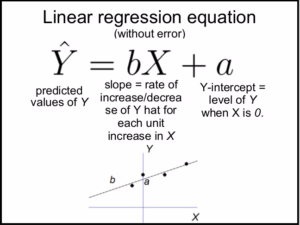

In [5]:
## Creating parameters
weight=0.7
bias=0.3

# we want to build a model to estimate these numbers
start=0
end=1
step=0.02
X=torch.arange(start,end ,step).unsqueeze(dim=1)
y=weight*X+bias 

In [6]:
print(len(X),len(y))

50 50


In [7]:
print(X.shape,y.shape)

torch.Size([50, 1]) torch.Size([50, 1])


## splitting data into training and testing sets 

In [16]:
train_split=int(0.8*(len(X)))
test_split=int(0.8*(len(y)))

In [17]:
print(train_split,test_split)

40 40


In [18]:
X_train,y_train=X[:train_split],y[:test_split]

In [19]:
X_test,y_test=X[train_split:],y[test_split:]

In [21]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

torch.Size([40, 1]) torch.Size([40, 1]) torch.Size([10, 1]) torch.Size([10, 1])


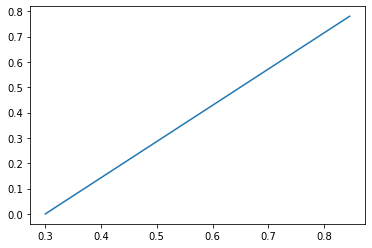

In [22]:
plt.plot(y_train,X_train)

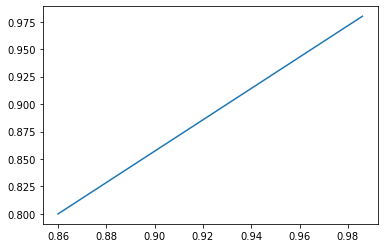

In [23]:
plt.plot(y_test,X_test)

In [24]:
# making a function for visualization

In [31]:
def visualizationPlotting(train_data=X_train,train_label=y_train,test_data=X_test,test_label=y_test,pred=None):
  plt.figure(figsize=(20,10))
  #plotting training data:
  plt.scatter(train_data,train_label,c='b',label="training data")
  #plotting testing data:
  plt.scatter(test_data,test_label,c='r',label="testing data")
  #prediction:
  if pred is not None:
    plt.scatter(test_data,pred)
  plt.legend()

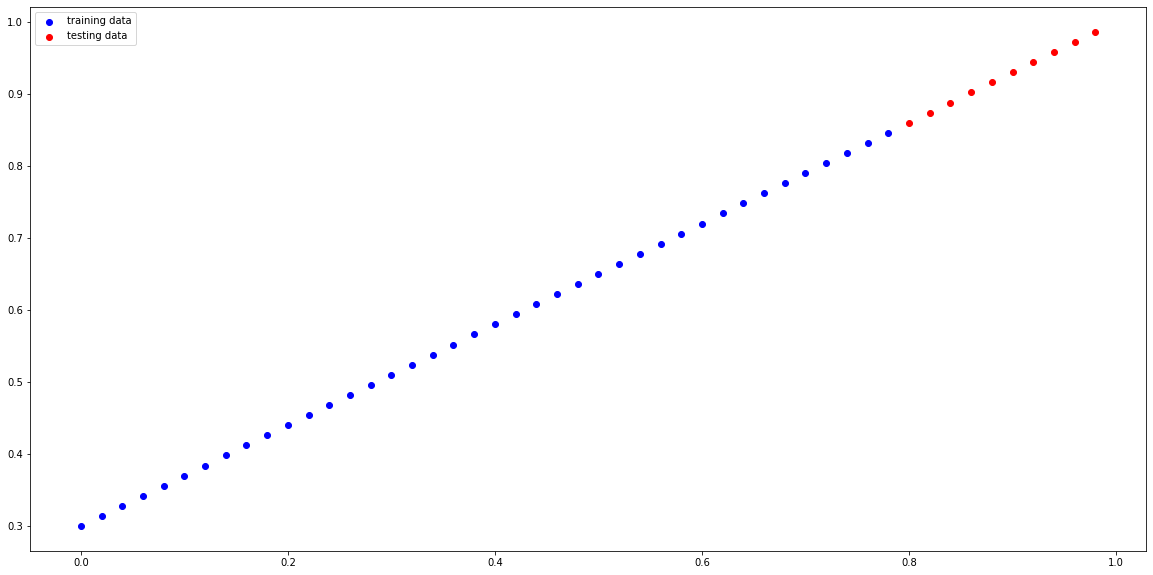

In [32]:
visualizationPlotting()

## Building our Regression Model

In [33]:
#creating our model class

now we are working with random parameters w,b and the model mession is to udpade those parameters to represent the pattern we want "linear " so after the model finishes its task , we must see the updated w and b simiar to w and we initialized above by our selfes which are 0.7 , 0.3

* what our model is doing:

1-start with random weighs and bias

2-look at the training data and adjust the random values to better represent the ideal values(0.7,0.3)

3-it is going to do that using gradient descent and backpropagation 


In [44]:
class LinearRegression(nn.Module): 
  # we are inheritting everything from nn.Module to use it in building our model
  #nn.Module is the bass class for all neural network modules 

  def __init__(self):
    super().__init__()
    #self.weight is considered as module parameter , module parameters have very special property when used with a module , they are automatically 
    #assigned to module.parameters iterator 

    # requires grad means finding the gradient 
    self.weights=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) 
  # a forwared method method 
  def forward(self,x): 
    # x is the input data
    return self.weights*x+self.bias # this is the linear regression model







In [45]:
Model=LinearRegression()

In [46]:
res=Model.forward(X_train)

In [48]:
res

tensor([[-1.7156],
        [-1.6727],
        [-1.6297],
        [-1.5867],
        [-1.5437],
        [-1.5008],
        [-1.4578],
        [-1.4148],
        [-1.3719],
        [-1.3289],
        [-1.2859],
        [-1.2430],
        [-1.2000],
        [-1.1570],
        [-1.1141],
        [-1.0711],
        [-1.0281],
        [-0.9851],
        [-0.9422],
        [-0.8992],
        [-0.8562],
        [-0.8133],
        [-0.7703],
        [-0.7273],
        [-0.6844],
        [-0.6414],
        [-0.5984],
        [-0.5555],
        [-0.5125],
        [-0.4695],
        [-0.4265],
        [-0.3836],
        [-0.3406],
        [-0.2976],
        [-0.2547],
        [-0.2117],
        [-0.1687],
        [-0.1258],
        [-0.0828],
        [-0.0398]], grad_fn=<AddBackward0>)